# A complete Hugging Face tutorial: how to build and train a vision transformer

In [ ]:
!pip install datasets evaluate transformers[sentencepiece]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 452.9/452.9 KB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.4/81.4 KB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 88.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.4/182.4 KB 28.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.0/213.0 KB 28.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.0/132.0 KB 19.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 111.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 79.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 KB 20.7 MB/s eta 0:00:00
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3


In [ ]:
!pip install tensorflow-addons

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 20.7 MB/s eta 0:00:00


In [ ]:
import tensorflow_addons as tfa

import tensorflow as tf

from tensorflow.keras import layers
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

In [ ]:
from datasets import load_dataset
from transformers import AutoTokenizer, DataCollatorWithPadding
import numpy as np

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_addons as tfa

In [ ]:
train_ds, test_ds = load_dataset('cifar10', split=['train[:5000]', 'test[:2000]'])

In [ ]:
splits = train_ds.train_test_split(test_size=0.1)

train_ds = splits['train']

val_ds = splits['test']

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Alexandre's drive Path 
Alex_path = "/content/drive/MyDrive/00-desorganizado/Dataset"
Le_path   = "/content/drive/MyDrive/01-projetos_colab/03-PHd/01-Covid_lung_deep"

Mounted at /content/drive


In [ ]:
import matplotlib.pyplot as plt   # plotting
import numpy as np                # linear algebra
import pandas as pd               # data processing, CSV file I/O (e.g. pd.read_csv)
import os                         # accessing directory structure
import pickle                     # reading pickle files format
from google.colab import drive    # google drive conection
import seaborn as sns             # graph bar

In [ ]:
# Loading gzip file
npzfile = np.load(Le_path + "/01_data/Img_X_Y.npz")

# Checking files inside zip file
npzfile.files

['X_img_numpy', 'Y_lab_numpy', 'df_pandas']

In [ ]:
# Reading it position
X = npzfile['X_img_numpy']
Y = npzfile['Y_lab_numpy']
IMG_df = pd.read_csv(Le_path + "/01_data"+'/01-lung-dataset-entry.csv')
print('Tamanho base de treino X',np.shape(X))
print('Tamanho base de treino Y',np.shape(Y))
print('Tamanho base de treino Y',np.shape(IMG_df))

Tamanho base de treino X (193419, 256, 256)
Tamanho base de treino Y (193419, 4)
Tamanho base de treino Y (193419, 15)


In [ ]:
Y_labels = np.delete(Y, 0, 1)

In [ ]:
from datasets import Dataset

In [ ]:
dit_lung = { "img" : X[:1000] , "label" : Y_labels[:1000]  }

In [ ]:
len(dit_lung)

In [ ]:
len(dit_lung)

In [ ]:
dataset_lung = Dataset.from_dict(dit_lung)

In [ ]:
dataset_lung

In [ ]:
train_ds

Dataset({
    features: ['img', 'label'],
    num_rows: 4500
})

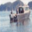

In [ ]:
train_ds['img'][1]

In [ ]:
train_ds['label'][1]

8

In [ ]:
from datasets import load_metric

metric = load_metric("accuracy")

# 02: Importing model

In [ ]:
from transformers import ViTForImageClassification

model = ViTForImageClassification.from_pretrained('google/vit-base-patch16-224')

model.eval()

# Feature extractor: This feature extractor will resize every image to the resolution that the model expects and normalize the channels.

In [ ]:
from transformers import ViTFeatureExtractor

feature_extractor = ViTFeatureExtractor.from_pretrained('google/vit-base-patch16-224-in21k')

Downloading:   0%|          | 0.00/160 [00:00<?, ?B/s]

# 3: RE

In [ ]:
def preprocess_images(examples):

    images = examples['img']
    images = [np.array(image, dtype=np.uint8) for image in images]
    images = [np.moveaxis(image, source=-1, destination=0) for image in images]
    inputs = feature_extractor(images=images)
    examples['pixel_values'] = inputs['pixel_values']

    return examples


In [ ]:
from transformers import ViTFeatureExtractor

feature_extractor = ViTFeatureExtractor.from_pretrained('google/vit-base-patch16-224-in21k')

Downloading:   0%|          | 0.00/160 [00:00<?, ?B/s]

In [ ]:
def preprocess_images(examples):

    images = examples['img']
    images = [np.array(image, dtype=np.uint8) for image in images]
    images = [np.moveaxis(image, source=-1, destination=0) for image in images]
    inputs = feature_extractor(images=images)
    examples['pixel_values'] = inputs['pixel_values']

    return examples

from datasets import Features, ClassLabel, Array3D, Image

features = Features({
    'label': ClassLabel(names=['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']),
    'img': Image(decode=True, id=None),
    'pixel_values': Array3D(dtype="float32", shape=(3, 224, 224)), })

preprocessed_train_ds = train_ds.map(preprocess_images, batched=True, features=features)
preprocessed_val_ds = val_ds.map(preprocess_images, batched=True, features=features)
preprocessed_test_ds = test_ds.map(preprocess_images, batched=True, features=features)

In [ ]:
from transformers import default_data_collator

data_collator = default_data_collator

In [ ]:
from transformers import ViTForImageClassification

model = ViTForImageClassification.from_pretrained('google/vit-base-patch16-224-in21k')

model.train()

In [ ]:
from torch import nn

In [ ]:
from transformers import ViTModel

class ViTForImageClassification2(nn.Module):

    def __init__(self, num_labels=10):

        super(ViTForImageClassification2, self).__init__()
        self.vit = ViTModel.from_pretrained('google/vit-base-patch16-224-in21k')
        self.classifier = nn.Linear(self.vit.config.hidden_size, num_labels)
        self.num_labels = num_labels

    def forward(self, pixel_values, labels):

        outputs = self.vit(pixel_values=pixel_values)
        logits = self.classifier(output)
        loss = None

        if labels is not None:

          loss_fct = nn.CrossEntropyLoss()
          loss = loss_fct(logits.view(-1, self.num_labels), labels.view(-1))

        return SequenceClassifierOutput(
            loss=loss,
            logits=logits,
            hidden_states=outputs.hidden_states,
            attentions=outputs.attentions,
        )

In [ ]:
from transformers import Trainer, TrainingArguments

In [ ]:
def compute_metrics(eval_pred):

    predictions, labels = eval_pred
    predictions = np.argmax(predictions, axis=1)
    return metric.compute(predictions=predictions, references=labels)

In [ ]:
help(TrainingArguments)


In [ ]:
args = TrainingArguments(
    "test-cifar-10",
    learning_rate=2e-5,
    per_device_train_batch_size=10,
    per_device_eval_batch_size=4,
    num_train_epochs=3,
    weight_decay=0.01,
    load_best_model_at_end=True,
    metric_for_best_model='AUC',
    logging_dir='logs',
)

ValueError: ignored

In [ ]:
trainer.train()

NameError: ignored

In [ ]:
trainer = Trainer(
    model,
    args,
    train_dataset = preprocessed_train_ds,
    eval_dataset = preprocessed_val_ds,
    data_collator = data_collator,
    compute_metrics = compute_metrics,
)